#THE CUSTOMERS WHO LEFT WITHIN THE LAST MONTH ---> THAT COLUMN IS CALLED AS CHUNK

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
df=pd.read_csv(r"C:\Users\Kale Ji\Downloads\WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.shape

(7043, 21)

In [6]:
df.drop('customerID',axis='columns',inplace=True)  #inplace=True modifies the existing database by removing the required column from the database

In [7]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [10]:
df.Churn

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7043, dtype: object

In [11]:
df.isna().value_counts()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  MultipleLines  InternetService  OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn
False   False          False    False       False   False         False          False            False           False         False             False        False        False            False     False             False          False           False         False    7043
dtype: int64

In [12]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [13]:
df.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [14]:
df.iloc[488]  #I we want to access the specific location or index we use iloc

gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                                 
Churn                                      No
Name: 488, dtype: object

In [15]:
pd.to_numeric(df.TotalCharges,errors='coerce') #errors='coerce' will ignore all the elements which give errors and jump off to next and give desired output

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [16]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [17]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [18]:
df1=df[df.TotalCharges!=" "]
df1.shape

(7032, 20)

In [19]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [20]:
#Still the TotalCharges is showing type as object

In [21]:
df1.TotalCharges=pd.to_numeric(df1.TotalCharges)

C:\Users\Kale Ji\AppData\Local\Temp\ipykernel_9144\695980592.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges=pd.to_numeric(df1.TotalCharges)


In [22]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [23]:
#tenure is an interesting parameter as it tells that the customer with more tenure is more likely to stay with the company 
#and the person with low tenure is likely to leave the company

In [24]:
df1[df1.Churn=='No'].tenure

0        1
1       34
3       45
6       22
7       10
        ..
7037    72
7038    24
7039    72
7040    11
7042    66
Name: tenure, Length: 5163, dtype: int64

In [25]:
df1[df1.Churn=='Yes'].tenure

2        2
4        2
5        8
8       28
13      49
        ..
7021    12
7026     9
7032     1
7034    67
7041     4
Name: tenure, Length: 1869, dtype: int64

In [26]:
tenure_churn_no=df1[df1.Churn=='No'].tenure
tenure_churn_yes=df1[df1.Churn=='Yes'].tenure

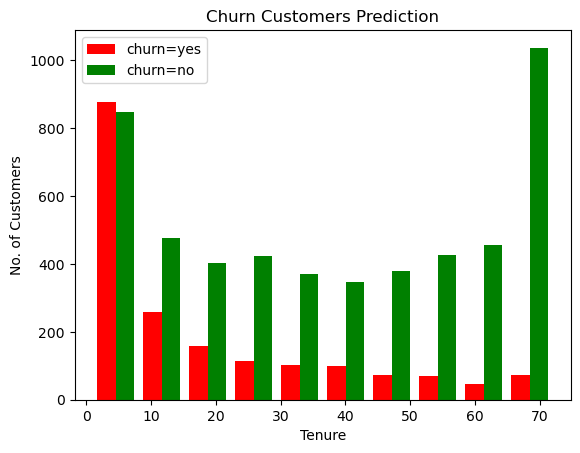

In [27]:

plt.hist([tenure_churn_yes,tenure_churn_no],color=['red','green'],label=['churn=yes','churn=no'])
plt.xlabel('Tenure')
plt.ylabel('No. of Customers')
plt.title('Churn Customers Prediction')
plt.legend()

In [28]:
tenure_churn_no1=df1[df1.Churn=='No'].MonthlyCharges
tenure_churn_yes1=df1[df1.Churn=='Yes'].MonthlyCharges

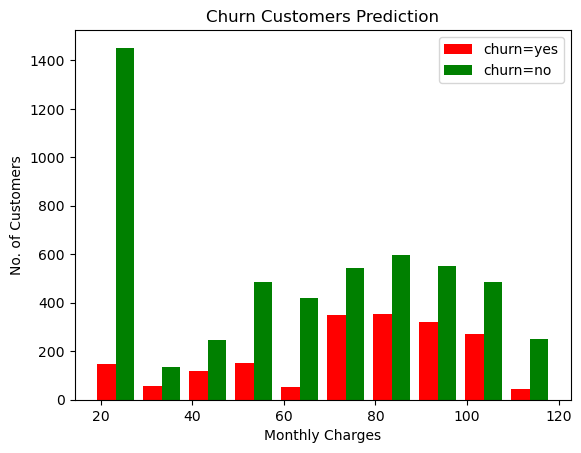

In [29]:
plt.hist([tenure_churn_yes1,tenure_churn_no1],color=['red','green'],label=['churn=yes','churn=no'])
plt.xlabel('Monthly Charges')
plt.ylabel('No. of Customers')
plt.title('Churn Customers Prediction')
plt.legend()

In [30]:
df1.tenure.unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26, 39], dtype=int64)

In [38]:
def func(df):
    for i in df:
        if df[i].dtypes=='object':
            print(i,' : ',df[i].unique())

In [39]:
func(df1)

gender  :  ['Female' 'Male']
Partner  :  ['Yes' 'No']
Dependents  :  ['No' 'Yes']
PhoneService  :  ['No' 'Yes']
MultipleLines  :  ['No phone service' 'No' 'Yes']
InternetService  :  ['DSL' 'Fiber optic' 'No']
OnlineSecurity  :  ['No' 'Yes' 'No internet service']
OnlineBackup  :  ['Yes' 'No' 'No internet service']
DeviceProtection  :  ['No' 'Yes' 'No internet service']
TechSupport  :  ['No' 'Yes' 'No internet service']
StreamingTV  :  ['No' 'Yes' 'No internet service']
StreamingMovies  :  ['No' 'Yes' 'No internet service']
Contract  :  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling  :  ['Yes' 'No']
PaymentMethod  :  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn  :  ['No' 'Yes']


In [40]:
df1.replace('No phone service','No',inplace=True)
df1.replace('No internet service','No',inplace=True)

C:\Users\Kale Ji\AppData\Local\Temp\ipykernel_9144\3221983738.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service','No',inplace=True)
C:\Users\Kale Ji\AppData\Local\Temp\ipykernel_9144\3221983738.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service','No',inplace=True)


In [41]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [42]:
func(df1)

gender  :  ['Female' 'Male']
Partner  :  ['Yes' 'No']
Dependents  :  ['No' 'Yes']
PhoneService  :  ['No' 'Yes']
MultipleLines  :  ['No' 'Yes']
InternetService  :  ['DSL' 'Fiber optic' 'No']
OnlineSecurity  :  ['No' 'Yes']
OnlineBackup  :  ['Yes' 'No']
DeviceProtection  :  ['No' 'Yes']
TechSupport  :  ['No' 'Yes']
StreamingTV  :  ['No' 'Yes']
StreamingMovies  :  ['No' 'Yes']
Contract  :  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling  :  ['Yes' 'No']
PaymentMethod  :  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn  :  ['No' 'Yes']


In [44]:
columns=['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for i in columns:
    df1[i].replace({'Yes':1,'No':0},inplace=True)

C:\Users\Kale Ji\AppData\Local\Temp\ipykernel_9144\264879364.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[i].replace({'Yes':1,'No':0},inplace=True)


In [45]:
func(df1)

gender  :  ['Female' 'Male']
InternetService  :  ['DSL' 'Fiber optic' 'No']
Contract  :  ['Month-to-month' 'One year' 'Two year']
PaymentMethod  :  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [46]:
df1['Partner'].dtypes

dtype('int64')

In [49]:
for i in df1:
    print(i,df1[i].unique())

gender ['Female' 'Male']
SeniorCitizen [0 1]
Partner [1 0]
Dependents [0 1]
tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService [0 1]
MultipleLines [0 1]
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity [0 1]
OnlineBackup [1 0]
DeviceProtection [0 1]
TechSupport [0 1]
StreamingTV [0 1]
StreamingMovies [0 1]
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling [1 0]
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn [0 1]


In [50]:
df1.gender.replace({'Female':1,'Male':0},inplace=True)

C:\Users\Kale Ji\AppData\Local\Temp\ipykernel_9144\3822423156.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.gender.replace({'Female':1,'Male':0},inplace=True)


In [51]:
df1.gender.unique()

array([1, 0], dtype=int64)

In [54]:
df2=pd.get_dummies(df1,columns=['InternetService','Contract','PaymentMethod'])

In [55]:
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [56]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [57]:
df2.dtypes   #All are converted to the integer format

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [59]:
cols=['tenure','MonthlyCharges','TotalCharges']
from sklearn.preprocessing import MinMaxScaler  #It scales the values of the required field to the range of 0 and 1
scaler=MinMaxScaler()
df2[cols]=scaler.fit_transform(df2[cols])

In [61]:
df2.MonthlyCharges.unique()

array([0.11542289, 0.38507463, 0.35422886, ..., 0.44626866, 0.25820896,
       0.60149254])

In [64]:
X=df2.drop('Churn',axis='columns')

In [65]:
y=df2.Churn

In [66]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [67]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5)

In [68]:
X_train.shape

(5625, 26)

In [69]:
X_test.shape

(1407, 26)

In [72]:
X_train[:5]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5664,1,1,0,0,0.126761,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
101,1,0,1,1,0.000000,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
2621,0,0,1,0,0.985915,1,0,0,1,1,...,1,0,0,0,0,1,0,1,0,0
392,1,1,0,0,0.014085,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1327,0,0,1,0,0.816901,1,1,0,0,1,...,0,1,0,0,1,0,1,0,0,0


In [73]:
import tensorflow as tf
from tensorflow import keras

In [76]:
model=keras.Sequential([
    keras.layers.Dense(20,input_shape=(26,),activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

In [86]:
model.compile(optimizer='adam',
             loss='binary_crossentropy',  #Binary_crossentropy is used as the result is in the form of 0 and 1
             metrics=['accuracy'])

In [87]:
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8266 - loss: 0.3897
Epoch 2/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8156 - loss: 0.3910
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8229 - loss: 0.3771
Epoch 4/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8214 - loss: 0.3856
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8097 - loss: 0.3894
Epoch 6/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8259 - loss: 0.3752
Epoch 7/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8104 - loss: 0.3966
Epoch 8/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8242 - loss: 0.3865
Epoch 9/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8193 - loss: 0.3868
Epoch 10/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8261 - loss: 0.3714
Epoch 11/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8176 - loss: 0.3932
Epoch 12/100
176/176 ━━━━━━━━━━━━━━━━━━━━

176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8193 - loss: 0.3837
Epoch 69/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8261 - loss: 0.3752
Epoch 70/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8257 - loss: 0.3744
Epoch 71/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8222 - loss: 0.3713
Epoch 72/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8267 - loss: 0.3713
Epoch 73/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8170 - loss: 0.3920
Epoch 74/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8240 - loss: 0.3730
Epoch 75/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8197 - loss: 0.3756
Epoch 76/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8235 - loss: 0.3731
Epoch 77/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8226 - loss: 0.3757
Epoch 78/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8191 - loss: 0.3777
Epoch 79/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 

In [88]:
model.evaluate(X_test,y_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7799 - loss: 0.4548 


[0.47142529487609863, 0.7761194109916687]

In [91]:
m=model.predict(X_test[:5])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


In [90]:
y_test[:5]

2660    0
744     0
5579    1
64      1
3287    1
Name: Churn, dtype: int64

In [92]:
y_pred=[]
for i in m:
    if i>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [93]:
y_pred

[0, 1, 0, 1, 0]

In [98]:
from sklearn.metrics import confusion_matrix
import seaborn as sb
cm=math.confusion_matrix(labels=y_test,predictions=y_pred)
plt.figure(figsize=(10,7))
sb.heatmap(cm,annot=True,fmt='d')

NameError: name 'math' is not defined

In [ ]:
#the formula for the precision can be 
#(Truth/truth+predicted)